<a href="https://colab.research.google.com/github/chehansivaruban/Cyber---SDGP/blob/main/datascience/model/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('dateindex1.csv',index_col=[0],parse_dates=True)

In [ ]:
data.values.shape

(105191, 1)

In [ ]:
data.head(5)

,G(i)
datetime,
2005-01-01 00:00:00,0.0
2005-01-01 01:00:00,55.0
2005-01-01 02:00:00,41.0
2005-01-01 03:00:00,203.0
2005-01-01 04:00:00,421.0


In [ ]:
data

,G(i)
datetime,
2005-01-01 00:00:00,0.0
2005-01-01 01:00:00,55.0
2005-01-01 02:00:00,41.0
2005-01-01 03:00:00,203.0
2005-01-01 04:00:00,421.0
...,...
2016-12-31 18:00:00,0.0
2016-12-31 19:00:00,0.0
2016-12-31 20:00:00,0.0


In [ ]:
#This will allow us to work with the data as one array of floating point values rather than mixed types (less efficient.)

data = data.astype('float')

In [ ]:
#information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105191 entries, 2005-01-01 00:00:00 to 2016-12-31 22:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   G(i)    105191 non-null  float64
dtypes: float64(1)
memory usage: 1.6 MB


In [ ]:
data

,G(i)
datetime,
2005-01-01 00:00:00,0.0
2005-01-01 01:00:00,55.0
2005-01-01 02:00:00,41.0
2005-01-01 03:00:00,203.0
2005-01-01 04:00:00,421.0
...,...
2016-12-31 18:00:00,0.0
2016-12-31 19:00:00,0.0
2016-12-31 20:00:00,0.0


In [ ]:
#Downsampling the data into dáy-wise bins and sum the values of the timestamps falling into a bin.

# data = data.resample('T').sum()

In [ ]:
#data after sampling it into daywise manner

data.head()

,G(i)
datetime,
2005-01-01 00:00:00,0.0
2005-01-01 01:00:00,55.0
2005-01-01 02:00:00,41.0
2005-01-01 03:00:00,203.0
2005-01-01 04:00:00,421.0


In [ ]:
years = ['2005', '2006', '2007', '2008']


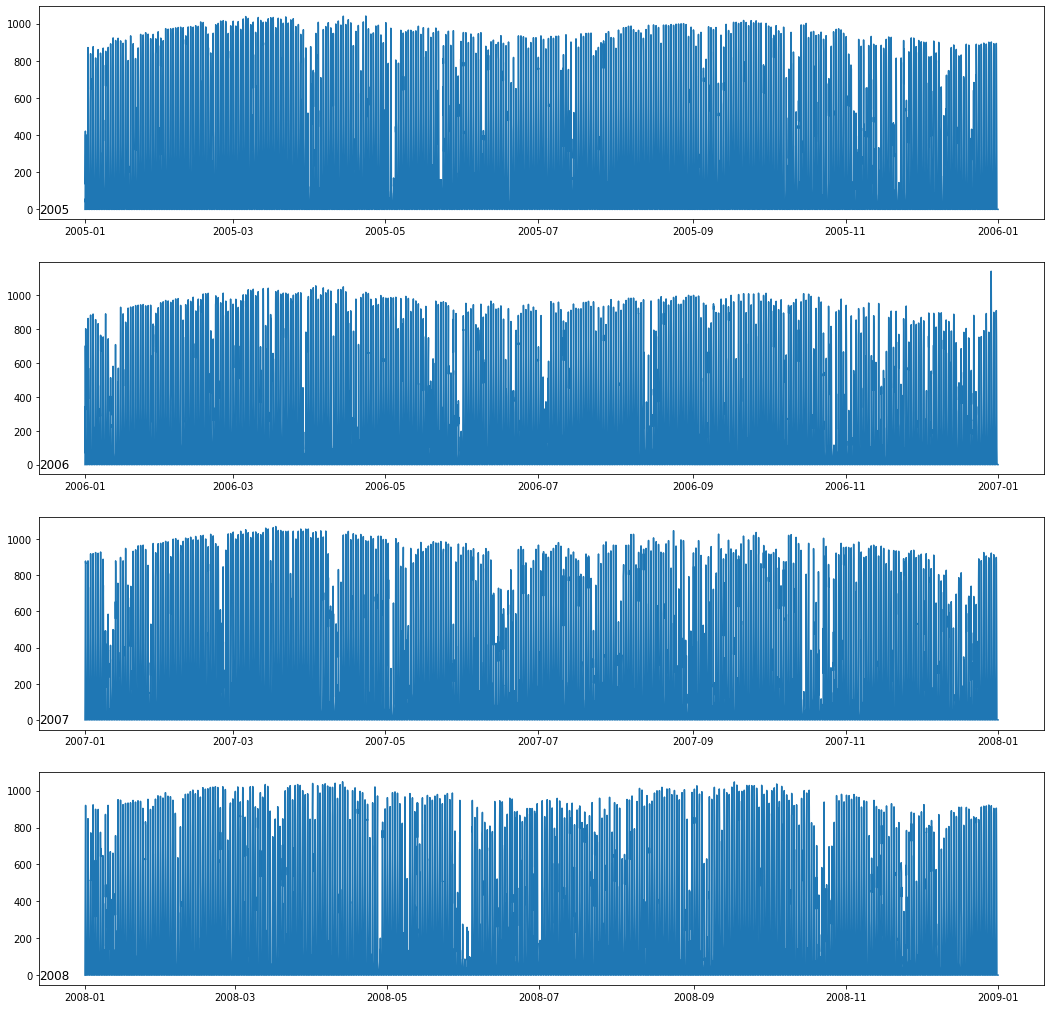

In [ ]:
fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years[i]
    active_power_data = data[str(year)]
    plt.plot(active_power_data['G(i)'])
    plt.title(str(year), y = 0, loc = 'left')
plt.show()
fig.tight_layout()

In [ ]:
#here are splitting the dataset
#dataset upto end of 2009 is in train dataset and remaining we keeping it in test dataset

data_train = data.loc[:'2012-12-31', :]['G(i)']
data

,G(i)
datetime,
2005-01-01 00:00:00,0.0
2005-01-01 01:00:00,55.0
2005-01-01 02:00:00,41.0
2005-01-01 03:00:00,203.0
2005-01-01 04:00:00,421.0
...,...
2016-12-31 18:00:00,0.0
2016-12-31 19:00:00,0.0
2016-12-31 20:00:00,0.0


In [ ]:
data_train.shape

(70128,)

In [ ]:
data_test = data['2012']['G(i)']
data_test.head()

datetime
2012-01-01 00:00:00      0.00
2012-01-01 01:00:00    141.00
2012-01-01 02:00:00    385.01
2012-01-01 03:00:00    599.01
2012-01-01 04:00:00    774.01
Name: G(i), dtype: float64

In [ ]:
data_test.shape

(8784,)

In [ ]:
#converting the data into numpy array

data_train = np.array(data_train)

In [ ]:
#we are splitting the data weekly wise(7days)

X_train, y_train = [], []

for i in range(7, len(data_train)-7):
    X_train.append(data_train[i-7:i])
    y_train.append(data_train[i:i+7])

In [ ]:
#converting list to numpy array

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
#shape of train and test dataset

X_train.shape, y_train.shape

((70114, 7), (70114, 7))

In [ ]:
#printing the ytrain value

pd.DataFrame(y_train).head()

,0,1,2,3,4,5,6
0,402.0,203.0,246.0,219.0,134.0,0.0,0.0
1,203.0,246.0,219.0,134.0,0.0,0.0,0.0
2,246.0,219.0,134.0,0.0,0.0,0.0,0.0
3,219.0,134.0,0.0,0.0,0.0,0.0,0.0
4,134.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Normalising the dataset between 0 and 1

x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)

In [ ]:
#Normalising the dataset

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)

In [ ]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6
0,0.000000,0.048288,0.035996,0.178225,0.369619,0.118524,0.219489
1,0.048288,0.035996,0.178225,0.369619,0.118524,0.219489,0.352938
2,0.035996,0.178225,0.369619,0.118524,0.219489,0.352938,0.178225
3,0.178225,0.369619,0.118524,0.219489,0.352938,0.178225,0.215977
4,0.369619,0.118524,0.219489,0.352938,0.178225,0.215977,0.192272


In [ ]:
#converting to 3 dimension

X_train = X_train.reshape(70114, 7, 1)

In [ ]:
X_train.shape

(70114, 7, 1)

In [ ]:
#building sequential model using Keras

reg = Sequential()
reg.add(LSTM(units = 200, activation = 'relu', input_shape=(7,1)))
reg.add(Dense(7))

In [ ]:
#here we have considered loss as mean square error and optimizer as adam

reg.compile(loss='mse', optimizer='adam')

In [ ]:
#training the model

reg.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2192/2192 [==============================] - 38s 17ms/step - loss: 0.0337
Epoch 2/100
2192/2192 [==============================] - 37s 17ms/step - loss: 0.0203
Epoch 3/100
2192/2192 [==============================] - 37s 17ms/step - loss: 0.0202
Epoch 4/100
2192/2192 [==============================] - 36s 16ms/step - loss: 0.0198
Epoch 5/100
2192/2192 [==============================] - 36s 17ms/step - loss: 0.0198
Epoch 6/100
2192/2192 [==============================] - 37s 17ms/step - loss: 0.0192
Epoch 7/100
2192/2192 [==============================] - 37s 17ms/step - loss: 0.0191
Epoch 8/100
2192/2192 [==============================] - 36s 17ms/step - loss: 0.0192
Epoch 9/100
2192/2192 [==============================] - 37s 17ms/step - loss: 0.0187
Epoch 10/100
2192/2192 [==============================] - 37s 17ms/step - loss: 0.0189
Epoch 11/100
2192/2192 [==============================] - 36s 17ms/step - loss: 0.0184
Epoch 12/100
2192/2192 [============================

In [ ]:
#testing dataset

data_test = np.array(data_test)

In [ ]:
#here we are splitting the data weekly wise(7days)

X_test, y_test = [], []

for i in range(7, len(data_test)-7):
    X_test.append(data_test[i-7:i])
    y_test.append(data_test[i:i+7])

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [ ]:
#converting to 3 dimension

X_test = X_test.reshape(8770, 7,1)

In [ ]:
X_test.shape

(8770, 7, 1)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
#bringing y_pred values to their original forms by using inverse transform

y_pred = y_scaler.inverse_transform(y_pred)

In [ ]:
y_pred

array([[ 7.64050543e-01,  6.40357018e-01,  4.78143990e-01, ...,
         1.10424876e-01,  2.93666124e-03,  8.72313976e-03],
       [ 6.50413692e-01,  4.96276647e-01,  3.13087404e-01, ...,
        -4.30575013e-03,  3.55064869e-03,  4.96673584e-03],
       [ 5.07423580e-01,  3.12699199e-01,  1.34073228e-01, ...,
        -9.14257765e-03,  2.96029449e-03,  3.84166837e-03],
       ...,
       [-1.64906681e-03,  2.14983523e-03, -5.34296036e-03, ...,
        -2.65657902e-03, -6.04093075e-04,  7.61002302e-04],
       [-1.93074346e-04,  1.50616467e-03, -4.44158912e-03, ...,
        -6.21375442e-03, -3.64845991e-03, -1.08864903e-03],
       [ 2.60332227e-03,  2.56691873e-03, -4.01633978e-03, ...,
        -2.88891792e-03, -2.17041373e-03,  1.26725435e-03]], dtype=float32)

In [ ]:
y_true = y_scaler.inverse_transform(y_test)

In [ ]:
y_true

array([[895.01, 780.01, 609.01, ..., 144.  ,   0.  ,   0.  ],
       [780.01, 609.01, 387.01, ...,   0.  ,   0.  ,   0.  ],
       [609.01, 387.01, 144.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

In [ ]:
def evaluate_model(y_true, y_predicted):
    scores = []
    
    #calculate scores for each day
    for i in range(y_true.shape[1]):
        mse = mean_squared_error(y_true[:, i], y_predicted[:, i])
        rmse = np.sqrt(mse)
        scores.append(rmse)
    
    #calculate score for whole prediction
    total_score = 0
    for row in range(y_true.shape[0]):
        for col in range(y_predicted.shape[1]):
            total_score = total_score + (y_true[row, col] - y_predicted[row, col])**2
    total_score = np.sqrt(total_score/(y_true.shape[0]*y_predicted.shape[1]))
    
    return total_score, scores

In [ ]:
evaluate_model(y_true, y_pred)

(415.69390510048106,
 [415.8430735802272,
  415.7466353755306,
  415.68251124489143,
  415.6552934502297,
  415.6497234553856,
  415.64862194610953,
  415.6314350848759])

In [ ]:
y_pred

array([[ 7.64050543e-01,  6.40357018e-01,  4.78143990e-01, ...,
         1.10424876e-01,  2.93666124e-03,  8.72313976e-03],
       [ 6.50413692e-01,  4.96276647e-01,  3.13087404e-01, ...,
        -4.30575013e-03,  3.55064869e-03,  4.96673584e-03],
       [ 5.07423580e-01,  3.12699199e-01,  1.34073228e-01, ...,
        -9.14257765e-03,  2.96029449e-03,  3.84166837e-03],
       ...,
       [-1.64906681e-03,  2.14983523e-03, -5.34296036e-03, ...,
        -2.65657902e-03, -6.04093075e-04,  7.61002302e-04],
       [-1.93074346e-04,  1.50616467e-03, -4.44158912e-03, ...,
        -6.21375442e-03, -3.64845991e-03, -1.08864903e-03],
       [ 2.60332227e-03,  2.56691873e-03, -4.01633978e-03, ...,
        -2.88891792e-03, -2.17041373e-03,  1.26725435e-03]], dtype=float32)

In [ ]:
#standard deviation

np.std(y_true[0])

342.01088242621637